In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install seaborn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,534 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122541 files and di

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.family'] = 'NanumGothic'

<h1>데이터 수정<h1>
<p>기존 데이터: 일별 박스오피스 10위 + 해당 영화의 네티즌 평점</p>
<p>수정한 데이터: 역대 박스오피스 200위(크롤링) + 해당 영화 정보(장르, 감독 등)(api) + 네티즌 평점(크롤링)</p>
<p>수정 이유: 앞서 평점을 가져왔던 네이버 영화페이지가 서비스종료. <br/>
일별 박스오피스는 10위까지만 가져오기 때문에 분석하기에 표본이 적음.</p>


In [50]:
df = pd.read_csv('movie_data.csv', index_col=0)
df.head()

,순위,영화명,개봉일,매출액,관객수,스크린수,상영횟수,영화코드,영화명(영어),제작년도,영화유형,제작상태,제작국가,영화장르,대표국가,대표 장르,디렉터,제작사,평점
0,1,명량,20140730,"135,758,658,810","17,615,919","1,587","188,726",20129370,The Admiral: Roaring Currents,2013.00,장편,개봉,한국,"사극,액션",한국,사극,김한민,(주)빅스톤픽쳐스,8.88
1,2,극한직업,20190123,"139,655,543,516","16,266,338","2,003","292,816",20182530,Extreme Job,2018.00,장편,개봉,한국,코미디,한국,코미디,이병헌,(주)어바웃잇,9.20
2,3,신과함께-죄와 벌,20171220,"115,727,528,087","14,414,658","1,912","214,631",20150976,Along with the Gods: The Two Worlds,2017.00,장편,개봉,한국,"판타지,드라마",한국,판타지,김용화,리얼라이즈픽쳐스(주),8.73
3,4,국제시장,20141217,"110,947,621,230","14,264,478","1,044","212,705",20137048,Ode to My Father,2014.00,장편,개봉,한국,드라마,한국,드라마,윤제균,(주)제이케이필름,9.16
4,5,어벤져스: 엔드게임,20190424,"122,492,181,020","13,977,602","2,835","246,433",20184889,Avengers: Endgame,2018.00,장편,개봉,미국,"액션,SF",미국,액션,안소니 루소,NaN,9.50


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   순위       200 non-null    int64  
 1   영화명      200 non-null    object 
 2   개봉일      200 non-null    int64  
 3   매출액      200 non-null    object 
 4   관객수      200 non-null    object 
 5   스크린수     200 non-null    object 
 6   상영횟수     200 non-null    object 
 7   영화코드     200 non-null    int64  
 8   영화명(영어)  200 non-null    object 
 9   제작년도     199 non-null    float64
 10  영화유형     200 non-null    object 
 11  제작상태     200 non-null    object 
 12  제작국가     200 non-null    object 
 13  영화장르     200 non-null    object 
 14  대표국가     200 non-null    object 
 15  대표 장르    200 non-null    object 
 16  디렉터      200 non-null    object 
 17  제작사      133 non-null    object 
 18  평점       176 non-null    float64
dtypes: float64(2), int64(3), object(14)
memory usage: 31.2+ KB


<h1>데이터 전처리</h1>

In [52]:
# 불필요한 열 제거. -> 필요한 열만 선택
selected_columns = ['순위', '영화명', '관객수', '대표 장르', '평점','개봉일', '매출액', '대표국가', '상영횟수' , '디렉터']
df = df[selected_columns]

# 데이터 타입 변환
df['관객수'] = df['관객수'].str.replace(',', '').astype(int)
df['매출액'] = df['매출액'].str.replace(',', '').astype(int)
df['상영횟수'] = df['상영횟수'].str.replace(',', '').astype(int)
df['평점'] = df['평점'].astype(float)

<ipython-input-52-3f8beb1824c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['관객수'] = df['관객수'].str.replace(',', '').astype(int)
<ipython-input-52-3f8beb1824c0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['매출액'] = df['매출액'].str.replace(',', '').astype(int)
<ipython-input-52-3f8beb1824c0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [53]:
# 중복값 확인
sum(df.duplicated(subset=['영화명']))

0

In [54]:
#누락된 값 확인
df.isna().sum()

순위        0
영화명       0
관객수       0
대표 장르     0
평점       24
개봉일       0
매출액       0
대표국가      0
상영횟수      0
디렉터       0
dtype: int64

In [55]:
#누락값 처리(평균값으로 처리)
df['평점'].fillna(df['평점'].mean(), inplace=True)

In [56]:
df.head()

,순위,영화명,관객수,대표 장르,평점,개봉일,매출액,대표국가,상영횟수,디렉터
0,1,명량,17615919,사극,8.88,20140730,135758658810,한국,188726,김한민
1,2,극한직업,16266338,코미디,9.20,20190123,139655543516,한국,292816,이병헌
2,3,신과함께-죄와 벌,14414658,판타지,8.73,20171220,115727528087,한국,214631,김용화
3,4,국제시장,14264478,드라마,9.16,20141217,110947621230,한국,212705,윤제균
4,5,어벤져스: 엔드게임,13977602,액션,9.50,20190424,122492181020,미국,246433,안소니 루소


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      200 non-null    int64  
 1   영화명     200 non-null    object 
 2   관객수     200 non-null    int64  
 3   대표 장르   200 non-null    object 
 4   평점      200 non-null    float64
 5   개봉일     200 non-null    int64  
 6   매출액     200 non-null    int64  
 7   대표국가    200 non-null    object 
 8   상영횟수    200 non-null    int64  
 9   디렉터     200 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 17.2+ KB


<h1>분석 및 시각화</h1>

In [58]:
pd.options.display.float_format = '{:.2f}'.format
df['대표 장르'].describe()

count     200
unique     16
top        액션
freq       73
Name: 대표 장르, dtype: object

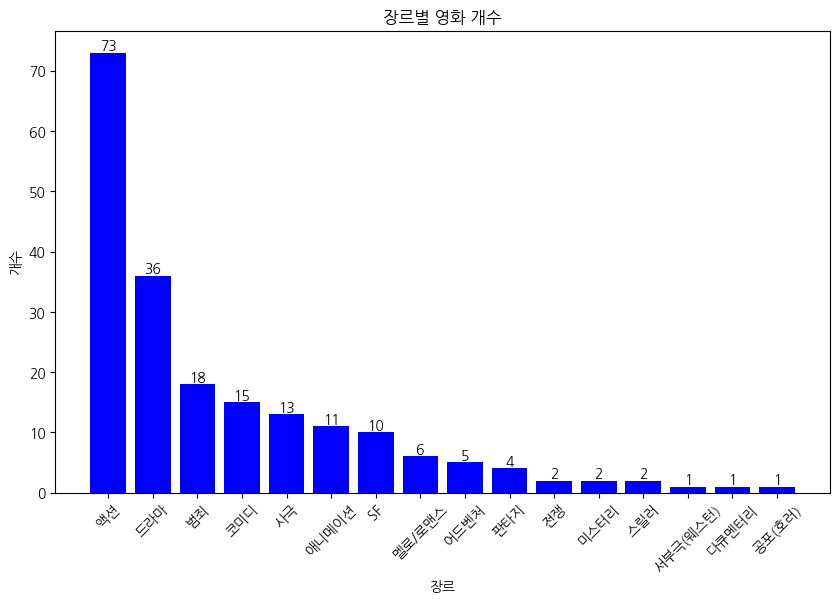

In [59]:
genre_counts = df['대표 장르'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='blue')
plt.title('장르별 영화 개수')
plt.xlabel('장르')
plt.ylabel('개수')
plt.xticks(rotation=45)

for i, count in enumerate(genre_counts.values):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()


<h1>장르 갯수가 2개, 1개인 경우는 표본이 부족하기 때문에 제거함</h1>

In [60]:
top10_genre = genre_counts[:10]
df = df[df['대표 장르'].isin(top10_genre.index)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      191 non-null    int64  
 1   영화명     191 non-null    object 
 2   관객수     191 non-null    int64  
 3   대표 장르   191 non-null    object 
 4   평점      191 non-null    float64
 5   개봉일     191 non-null    int64  
 6   매출액     191 non-null    int64  
 7   대표국가    191 non-null    object 
 8   상영횟수    191 non-null    int64  
 9   디렉터     191 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 16.4+ KB


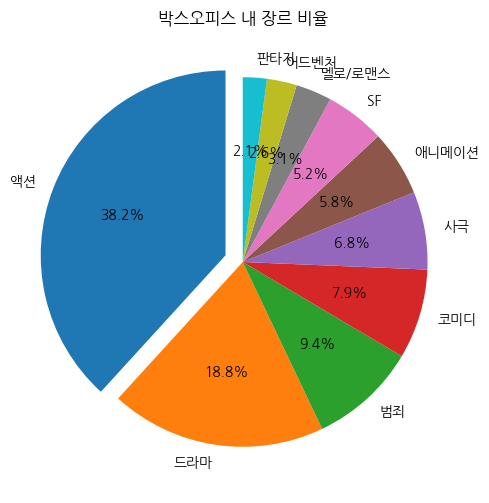

In [61]:
explode = [0.1] + [0] * (len(top10_genre) - 1)

fig, axes = plt.subplots(figsize=(8,6))
axes.pie(top10_genre, labels=top10_genre.index, startangle=90, autopct='%.1f%%', explode=explode)
axes.set_title('박스오피스 내 장르 비율')
plt.show()

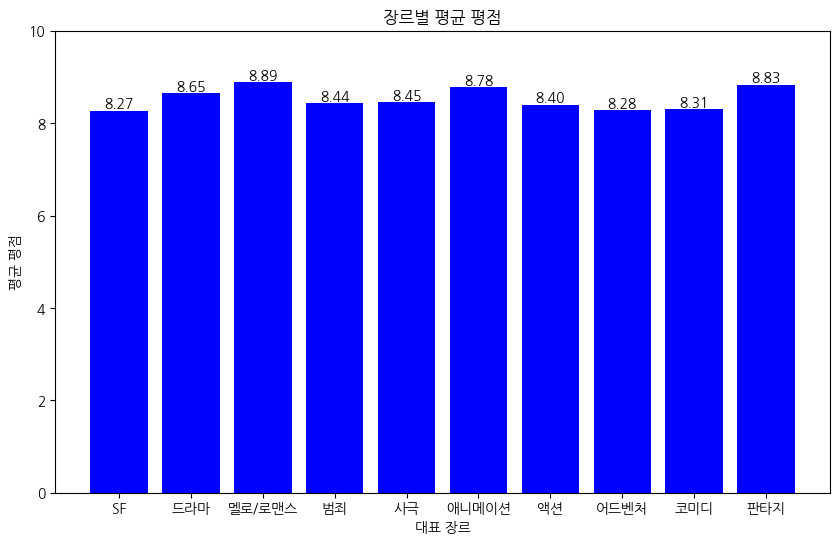

In [62]:
#장르별 평균 평점
genre_data = df.groupby('대표 장르')['평점'].mean()

# 막대 그래프
plt.figure(figsize=(10, 6))
plt.bar(genre_data.index, genre_data, color='blue')
plt.xlabel('대표 장르')
plt.ylabel('평균 평점')
plt.ylim(bottom=0, top=10)
plt.title('장르별 평균 평점')

for i, v in enumerate(genre_data):
    plt.annotate(f'{v:.2f}',(i, v), ha = 'center', va = 'bottom')
    
plt.show()

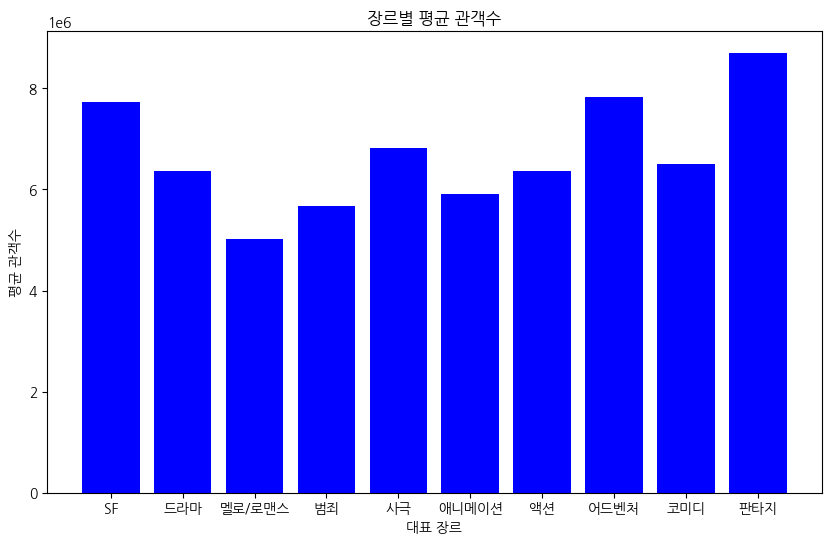

In [63]:
# 장르별 평균 관객수
genre_data = df.groupby('대표 장르')['관객수'].mean()

# 막대 그래프
plt.figure(figsize=(10, 6))
plt.bar(genre_data.index, genre_data, color='blue')
plt.xlabel('대표 장르')
plt.ylabel('평균 관객수')
plt.title('장르별 평균 관객수')
plt.show()

<h1>액션 장르가 가장 많았지만 그렇다고 평균 평점이나 관객수가 가장 높은건 아님</h1>
<h1>그렇다면 관객수와 평점, 박스오피스 순위와 평점 사이의 관계가 있을까?</h1>
<h1>가설: 관객수와 순위가 높을수록 네티즌 평점도 좋을것이다.</h1>
<h1> 상관계수 공식</h1>

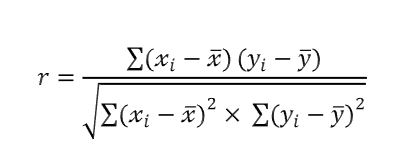

In [64]:
peoples = df['관객수']
scores = df['평점']

# 순위와 평점에 해당하는 평균값 계산.
mean_peoples = peoples.mean()
mean_scores = scores.mean()

# 값에서 평균값을 뺌.
minus_peoples = peoples - mean_peoples
minus_scores = scores - mean_scores

# 표준편차
std_peoples = peoples.std()
std_scores = scores.std()

# 공분산
cov = (minus_peoples * minus_scores).mean()

# 상관 계수
r = cov / (std_peoples * std_scores)
print(r)

0.19319226452316238


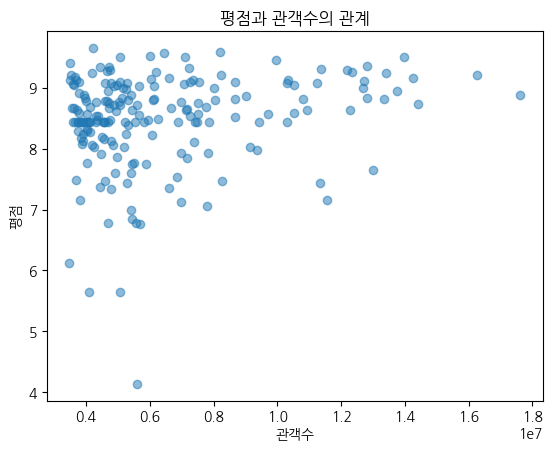

In [65]:
plt.scatter(df['관객수'], df['평점'], alpha = 0.5)
plt.xlabel('관객수')
plt.ylabel('평점')
plt.title('평점과 관객수의 관계')
plt.show()

In [66]:
rankings = df['순위']
scores = df['평점']

# 순위와 평점에 해당하는 평균값 계산.
mean_rankings = rankings.mean()
mean_scores = scores.mean()

# 값에서 평균값을 뺌.
minus_rankings = rankings - mean_rankings
minus_scores = scores - mean_scores

# 표준편차
std_rankings = rankings.std()
std_scores = scores.std()

# 공분산
cov = (minus_rankings * minus_scores).mean()

# 상관 계수
r = cov / (std_rankings * std_scores)
print(r)

-0.1281234996676324


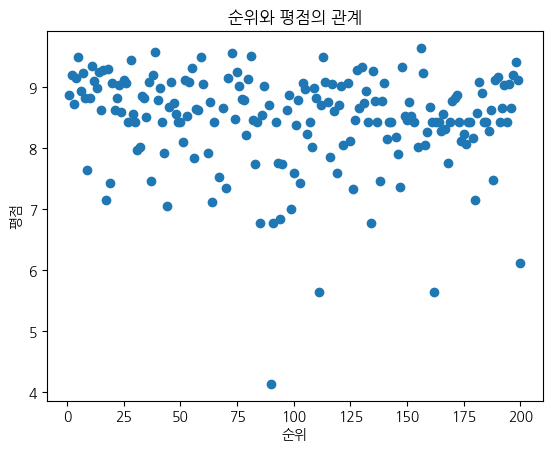

In [67]:
plt.scatter(df['순위'], df['평점'])
plt.xlabel('순위')
plt.ylabel('평점')
plt.title('순위와 평점의 관계')
plt.show()

<h1>분석 결과</h1>
<p>1. 박스오피스내 가장 많은 장르는 액션 장르이다. <br/>
2. 그렇다고 액션장르가 평균 평점과 평균 관객수가 가장 높은건 아님<br/>
3. 관객수가 많을 수록 평점이 높아지는 것은 아니다. <br/>
4. 박스오피스의 순위가 높을 수록 평점이 높은것도 아니다. <br/>
<h1>시사점 도출</h1>
관객수와 박스오피스 순위는 네티즌 평점과는 큰 연관성이 없음을 알 수 있었다. <br/>
해당 데이터만으로는 사람들이 선호하는 장르가 무엇이다라고 얘기하기 애매하기 때문에 영화의 흥행을 정확히 예측하기 어렵다 <br/>
하지만 해당 데이터로 박스오피스 내 가장 많은 장르와 가장 높은 평균 평점, 관객수를 가진 장르를 알 수 있기 때문에 어느정도 예상은 할 수 있다.</p>

<h1>아쉬웠던 점</h1>
처음에는 해당 데이터로 어떤 영화가 흥행할지 예측하는 모델을 만들어보고 싶었는데 
데이터의 분석 결과 예상과 다른 방향으로 나왔고 예측 모델을 만드는 것에 대한 이해도가 부족하여 만들어 보지 못한것이 아쉽다. 
데이터에 연도별 박스오피스와 같은 부분을 추가하여 표본을 늘려서 시도해보고자 했지만 수집 단계에서 동적으로 처리하는 페이지를 크롤링하지 못해 시도하지 못한점이 아쉽다.

<h1>